# Evalutaion Metrics

## Classification
    > Accuracy
    > Precision
    > Recall
    > F1 Score(F1)
    > ROC/AUC
    > Log Loss
    > Precision @ k
    > Average Precision @ k
    > Mean Average Precision @ k

## Regression
    > MAE
    > MSE
    > RMSE
    > RMSLE
    > MPE - Mean percentage Error
    > MAPE
    > R2

## Advanced Metrics
    > Quadratic weighed Kappa -- QWK -- Cohen's Kappa   (metrics.cohen_kappa_score)
    > Mathew's Coreelation coefficent - MCC - (-1 to 1)
    

# Accuracy(0-1)

In [115]:
import warnings
import matplotlib.pyplot as plt
import numpy as np
from collections import Counter
warnings.filterwarnings('ignore')

In [15]:
def accuracy(y_true, y_pred):
    correct_counter = 0
    
    for yt,yp in zip(y_true, y_pred):
        if yt==yp:
            correct_counter += 1
    
    return correct_counter / len(y_true)
        

In [16]:
# we can calculate using Scikit-learn
from sklearn import metrics

l1 = [0,1,1,1,0,0,0,1]
l2 = [1,1,1,0,0,0,0,1]

metrics.accuracy_score(l1,l2)

0.75

In [17]:
accuracy(l1,l2)

0.75

In [34]:
l1 = [1,0,0,1,0,0,1,1]
l2 = [1,1,1,0,0,0,0,0]

# Precision(0-1)

In [6]:
def true_positive(y_true,y_pred):
    tp=0
    for yt,yp in zip(y_true,y_pred):
        if yt == 1 and yp == 1:
            tp += 1
    return tp

In [7]:
def true_negative(y_true,y_pred):
    tn=0
    for yt,yp in zip(y_true,y_pred):
        if yt == 0 and yp == 0:
            tn += 1
    return tn

In [8]:
def false_positive(y_true,y_pred):
    fp=0
    for yt,yp in zip(y_true,y_pred):
        if yt == 0 and yp == 1:
            fp += 1
    return fp

In [9]:
def false_negative(y_true,y_pred):
    fn=0
    for yt,yp in zip(y_true,y_pred):
        if yt == 1 and yp == 0:
            fn += 1
    return fn

In [21]:
true_positive(l1,l2)

3

In [22]:
false_positive(l1,l2)

1

In [23]:
true_negative(l1,l2)

3

In [24]:
false_negative(l1,l2)

1

In [35]:
def accuracy_cust(y_true,y_pred):
    tp = true_positive(y_true,y_pred)
    tn = true_negative(y_true,y_pred)
    fp = false_positive(y_true,y_pred)
    fn = false_negative(y_true,y_pred)
    
    accuracy_score = (tp + tn)/(tp+tn+fp+fn)
    return accuracy_score

In [26]:
accuracy_cust(l1,l2)

0.75

In [27]:
metrics.accuracy_score(l1,l2)

0.75

In [38]:
accuracy(l1,l2)

0.375

In [36]:
def precision(y_true, y_pred):
    tp = true_positive(y_true, y_pred)
    fp = false_positive(y_true, y_pred)
    
    precision = tp / (tp + fp)
    return precision

In [37]:
precision(l1,l2)

0.3333333333333333

# Recall(0-1)

In [40]:
def recall(y_true, y_pred):
    tp = true_positive(y_true, y_pred)
    fn = false_negative(y_true, y_pred)
    
    recall = tp / (tp+fn)
    return recall

In [42]:
recall(l1, l2)

0.25

In [45]:
y_true = [0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1]

In [47]:
len(y_true)

20

In [61]:
import random

random.random()

0.17902320063939614

In [64]:
y_pred = []
for i in range(0,20):
    n = random.random()
    y_pred.append(n)

In [67]:
len(y_pred)
y_pred

[0.6069565299247417,
 0.5044293188835296,
 0.3948547678679223,
 0.011518112832820893,
 0.9221746274573671,
 0.5261910302072192,
 0.16020806760892314,
 0.7120056463892878,
 0.34049009418243514,
 0.5442495656626312,
 0.6692283847230834,
 0.3951085422757704,
 0.2033178027435758,
 0.10611400336585386,
 0.08846313633150715,
 0.27340287848181866,
 0.5368952747595358,
 0.851906190030933,
 0.18204188088200324,
 0.7331398055481811]

# Precision vs Recall

In [69]:
precisions =[]
recalls = []
thresholds = [0.6069565299247417, 0.5044293188835296, 0.3948547678679223, 0.011518112832820893, 0.9221746274573671,
             0.5261910302072192, 0.16020806760892314, 0.7120056463892878, 0.34049009418243514, 0.5442495656626312,
              0.6692283847230834, 0.3951085422757704, 0.2033178027435758, 0.10611400336585386, 0.08846313633150715]

for i in thresholds:
    temp_prediction = [1 if x >= i else 0 for x in y_pred ]
    p = precision(y_true, temp_prediction)
    r = recall(y_true, temp_prediction)
    
    precisions.append(p)
    recalls.append(r)

Text(0, 0.5, 'Precision')

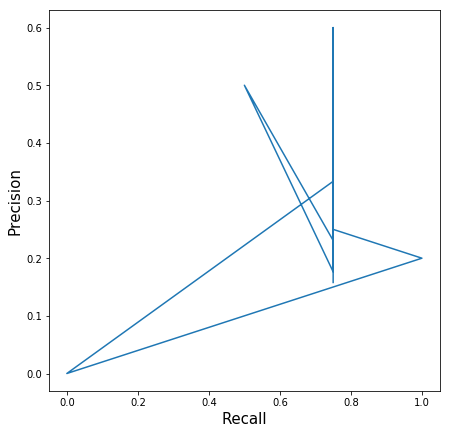

In [71]:
plt.figure(figsize=(7,7))
plt.plot(recalls, precisions)
plt.xlabel('Recall', fontsize=15)
plt.ylabel('Precision', fontsize=15)

# F1 score (0-1) - Skewed DS

In [81]:
def f1(y_true, y_pred):
    p = precision(y_true,y_pred)
    r = recall(y_true,y_pred)
    score = 2 *p*r /(p + r)
    return score

In [79]:
y_true = [0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1]
y_pred = [0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1]


In [82]:
f1(y_true,y_pred)

0.7272727272727272

In [83]:
metrics.f1_score(y_true,y_pred)

0.7272727272727272

# TPR - True Positive Rate - Sensitivity

In [85]:
def tpr(y_true,y_pred):
    return recall(y_true,y_pred)

# FPR - False Positive Rate - Specificity

In [86]:
def fpr(y_true, y_pred):
    fp = false_positive(y_true, y_pred)
    tn = true_negative(y_true, y_pred)
    return fp / (tn + fp)

In [88]:
tpr_list = []
fpr_list = []

# actual_targets
y_true = [0,0,0,0,1,0,1,0,0,1,0,1,0,0,1]

#predicted probabilities of a sample being 1
y_pred = [0.1,0.3,0.2,0.6,0.8,0.05,0.9,0.5,0.3,0.66,0.3,0.2,0.85,0.15,0.99]

#Threshold
thresholds = [0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.85,0.9,0.99,1.0]

for thres in thresholds:
    temp_pred = [1 if x >= thres else 0 for x in y_pred]
    
    temp_tpr = tpr(y_true, temp_pred)
    temp_fpr = fpr(y_true, temp_pred)
    tpr_list.append(temp_tpr)
    fpr_list.append(temp_fpr)

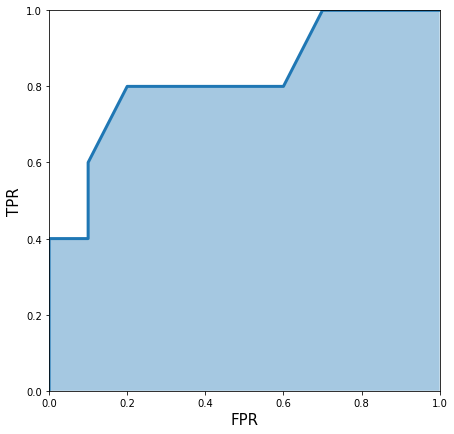

In [90]:
plt.figure(figsize=(7,7))
plt.fill_between(fpr_list, tpr_list, alpha = 0.4)
plt.plot(fpr_list, tpr_list, lw = 3)
plt.xlim(0,1.0)
plt.ylim(0,1.0)
plt.xlabel('FPR', fontsize=15)
plt.ylabel('TPR', fontsize=15)
plt.show()

# ROC-AUC

In [92]:
y_true = [0,0,0,0,1,0,1,0,0,1,0,1,0,0,1]
y_pred = [0.1,0.3,0.2,0.6,0.8,0.05,0.9,0.5,0.3,0.66,0.3,0.2,0.85,0.15,0.99]

metrics.roc_auc_score(y_true, y_pred)

0.8300000000000001

In [93]:
tp_list = []
fp_list = []

y_true = [0,0,0,0,1,0,1,0,0,1,0,1,0,0,1]
y_pred = [0.1,0.3,0.2,0.6,0.8,0.05,0.9,0.5,0.3,0.66,0.3,0.2,0.85,0.15,0.99]

thresholds = [0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.85,0.9,0.99,1.0]

for thresh in thresholds:
    temp_pred = [1 if x >= thresh else 0 for x in y_pred ]
    temp_tp = true_positive(y_true, temp_pred)
    temp_fp = false_positive(y_true, temp_pred)
    tp_list.append(temp_tp)
    fp_list.append(temp_fp)

# log loss

In [96]:
def log_loss(y_true, y_proba):
    epsilon = 1e-15
    loss = []
    
    for yt, yp in zip(y_true, y_proba):
        temp_loss = -1.0 * (yt * np.log(yp) + (1 - yt) * np.log(1 - yp))
        loss.append(temp_loss)
    return np.mean(loss)    
    

In [97]:
y_true = [0,0,0,0,1,0,1,0,0,1,0,1,0,0,1]
y_proba = [0.1,0.3,0.2,0.6,0.8,0.05,0.9,0.5,0.3,0.66,0.3,0.2,0.85,0.15,0.99]

log_loss(y_true, y_proba)

0.49882711861432294

In [99]:
from sklearn import metrics

metrics.log_loss(y_true, y_proba)

0.49882711861432294

# Macro precision -- Multi-Class classification

In [101]:
def macro_precision(y_true, y_pred):
    num_classes = len(np.unique(y_true))
    
    precision = 0
    
    for class_ in range(num_classes):
        temp_true = [1 if p == class_ else 0 for p in y_true]
        temp_pred = [1 if p == class_ else 0 for p in y_pred]
        
        tp = true_positive(temp_true, temp_pred)
        fp = false_positive(temp_true, temp_pred)
        
        temp_precision = tp / (tp + fp)
        precision += temp_precision
        
    precision /= num_classes
    return precision        

# Micro Precision

In [102]:
def micro_precision(y_true, y_pred):
    num_classes = len(np.unique(y_true))
    
    tp = 0
    fp = 0
    for class_ in range(num_classes):
        temp_true = [1 if p == class_ else 0 for p in y_true]
        temp_pred = [1 if p == class_ else 0 for p in y_pred]
        
        tp += true_positive(temp_true, temp_pred)
        fp += false_positive(temp_true, temp_pred)
                
    precision = tp / (tp+ fp)
    return precision  

# Weighted Precision

In [120]:
def weighted_precision(y_true, y_pred):
    num_classes = len(np.unique(y_true))
    
    class_counts = Counter(y_true)
    precision = 0
    
    for class_ in range(num_classes):
        temp_true = [1 if p == class_ else 0 for p in y_true]
        temp_pred = [1 if p == class_ else 0 for p in y_pred]
        
        tp = true_positive(temp_true, temp_pred)
        fp = false_positive(temp_true, temp_pred)
        
        temp_precision = tp / (tp + fp)
        
        weighted_precision = class_counts[class_] * temp_precision
        precision += weighted_precision
        
    overall_precision = precision / len(y_true)
    return overall_precision 

In [104]:
y_true = [0,1,2,0,1,2,0,2,2]
y_pred = [0,2,1,0,2,1,0,0,2]

In [105]:
macro_precision(y_true, y_pred)

0.3611111111111111

In [106]:
metrics.precision_score(y_true,y_pred,average="macro")

0.3611111111111111

In [107]:
micro_precision(y_true, y_pred)

0.4444444444444444

In [108]:
metrics.precision_score(y_true, y_pred, average="micro")

0.4444444444444444

In [121]:
weighted_precision(y_true, y_pred)

0.39814814814814814

In [114]:
metrics.precision_score(y_true,y_pred, average="weighted")

0.39814814814814814

# Weighted F1

In [125]:
def weighted_f1(y_true, y_pred):
    num_classes = len(np.unique(y_true))
    
    class_counts = Counter(y_true)
    
    f1 = 0
    
    for class_ in range(num_classes):
        temp_true = [1 if p == class_ else 0  for p in y_true]
        temp_pred = [1 if p == class_ else 0  for p in y_pred]
        
        p = precision(temp_true, temp_pred)
        r = recall(temp_true, temp_pred)
        
        if (p + r)!= 0:
            temp_f1 = 2 * p * r / (p + r)
            
        else:
            temp_f1 = 0
            
        weighted_f1 = class_counts[class_] * temp_f1
        
        f1 += weighted_f1
    
    overall_f1 = f1/len(y_true)
    return overall_f1    
        

In [127]:
weighted_f1(y_true,y_pred)

0.41269841269841273

In [128]:
metrics.f1_score(y_true, y_pred, average= "weighted")

0.41269841269841273

# Confusion Matrix

In [129]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics

Text(50.5, 0.5, 'Predicted Labels')

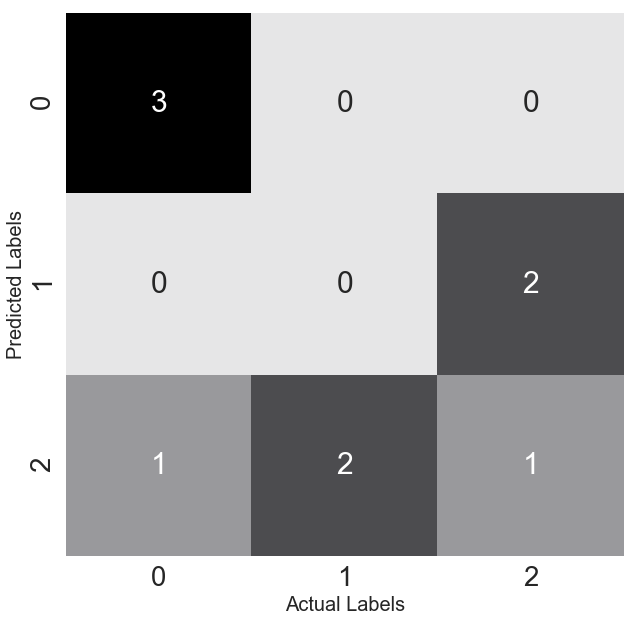

In [130]:
y_true = [0,1,2,0,1,2,0,2,2]
y_pred = [0,2,1,0,2,1,0,0,2]

cm = metrics.confusion_matrix(y_true, y_pred)

plt.figure(figsize=(10,10))
cmap = sns.cubehelix_palette(50, hue=0.05, rot=0,light=0.9,dark=0, as_cmap=True)
sns.set(font_scale=2.5)
sns.heatmap(cm,annot=True, cmap=cmap, cbar=False)
plt.xlabel('Actual Labels', fontsize = 20)
plt.ylabel('Predicted Labels', fontsize = 20)


# Precision @k

In [133]:
def pk(y_true, y_pred, k):
    if k == 0:
        return 0
    
    y_pred = y_pred[:k]
    pred_set = set(y_pred)
    true_set= set(y_true)
    common_values = pred_set.intersection(true_set)
    return len(common_values) / len(y_pred[:k])
    

# Average Precision @k

In [140]:
def apk(y_true, y_pred, k):
    
    pk_values = []
    
    for i in range(1, int(k) + 1):
        pk_values.append(pk(y_true, y_pred, i))
        
    if len(pk_values) == 0:
        return 0
    
    return sum(pk_values) / len(pk_values)
        

In [141]:
y_true = [[1,2,3],
         [0,2],
         [1],
         [2,3],
         [1,0],
         []
         ]

y_pred = [[0,1,2]
         [1],
         [0,2,3],
         [2,3,4,0],
         [0,1,2],
         [0]
         ]

In [142]:
for i in range(len(y_true)):
    for j in range(1,4):
        print(
            f"""
            y_true = {y_true[i]},
            y_pred = {y_pred[i]},
            AP@{j} = {apk(y_true[i], y_pred[i], k=j)}
            """
        )        

TypeError: 'int' object is not subscriptable

# Regression

# Mean Absolute Error - MAE

In [143]:
def mean_absolute_error(y_true, y_pred):
    error = 0
    
    for yt, yp in zip(y_true, y_pred):
        error += np.abs(yt - yp)
    
    return error / len(y_true)   
    

# Mean Squared Error -MSE

In [144]:
def mean_squared_error(y_true, y_pred):
    error = 0
    
    for yt, yp in zip(y_true, y_pred):
        error += (yt - yp) ** 2
    
    return error / len(y_true)   

# RMSE , Squared logarithmic Error -SLE

In [145]:
def mean_squared_log_error(y_true, y_pred):
    error = 0
    for yt, yp in zip(y_true, y_pred):
        error += (np.log(1 + yt) - np.log(1 + yp)) ** 2
    
    return error / len(y_true)
        

# Mean Percentage Error

In [146]:
def mean_percentage_error(y_true, y_pred):
    error = 0
    for yt, yp in zip(y_true, y_pred):
        error += (yt - yp) / yt
    
    return error / len(y_true)

# Mean Absolute Percentage Error

In [147]:
def mean_abs_percentage_error(y_true, y_pred):
    error = 0
    for yt, yp in zip(y_true, y_pred):
        error += np.abs(yt - yp) / yt
    
    return error / len(y_true)

# R2

In [ ]:
import numpy as np

def r2(y_true,y_pred):
    mean_true_value = np.mean(y_true)
    numerator = 0
    denominator = 0
    
    for yt, yp in zip(y_true, y_pred):
        numerator += (yt - yp) ** 2
        denominator += (yt - mean_true_value) ** 2

# MAE -- Efficient code without loops

In [1]:
import numpy as np

def mae_np(y_true,y_pred):
    return np.mean(np.abs(y_true - y_pred))

In [4]:
from sklearn import metrics

y_true = [1,2,3,1,2,3,1,2,3]
y_pred = [2,1,3,1,2,3,3,1,2]

metrics.cohen_kappa_score(y_true,y_pred, weights = "quadratic")


0.33333333333333337

In [5]:
metrics.accuracy_score(y_true, y_pred)

0.4444444444444444

# MCC - Matthew's Correlation Coefficent

In [10]:
def mcc(y_true,y_pred):
    tp = true_positive(y_true,y_pred)
    tn = true_negative(y_true,y_pred)
    fp = false_positive(y_true,y_pred)
    fn = false_negative(y_true,y_pred)
    
    numerator = (tp * tn) - (fp * fn)
    
    denominator ((tp + fp) * (fn + tn) * (fp + tn) * (tp + fn))
    denominator = denominator ** 0.5
    return numerator / denominator
    

# END